In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('car data.csv')

In [29]:
data.head()
#Target variable is selling price
#Present price is the original price of that car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [31]:
data.shape

(301, 9)

In [32]:
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  301
Number of columns:  9


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [35]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
data.describe()  #shows statistics for numerical columns

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [37]:
#creating new feature as age
import datetime

date_time = datetime.datetime.now()
data['Age'] = date_time.year - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [38]:
data.drop('Year',axis = 1,inplace = True)
#The axis parameter specifies whether you want to drop rows or columns.
#axis=0 refers to rows, and axis=1 refers to columns.
#The inplace parameter is a boolean value.
#If inplace=True, the operation is performed on the original DataFrame, and no new DataFrame is returned.
#If inplace=False, the method returns a new DataFrame with the column dropped, and the original DataFrame remains unchanged.

In [39]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


<Axes: ylabel='Selling_Price'>

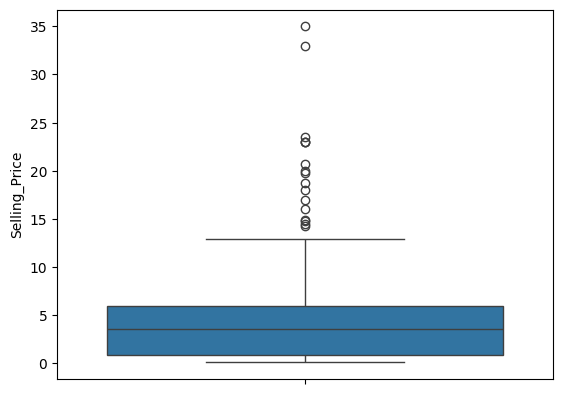

In [40]:
#detecting outlier in selling price
import seaborn as sns
sns.boxplot(data['Selling_Price'])
#2 data points are far away so they are outlier

In [41]:
#Getting rid of outlier
sorted(data['Selling_Price'],reverse=True)


[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [42]:
data[(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,7
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,14


In [46]:
#gettin rid of outliers
data = data[~(data['Selling_Price']>=33.0) & (data['Selling_Price']<=35.0)]
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [47]:
data.shape

(299, 9)

Encoding categorical values to numerical values

In [48]:
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [49]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [50]:
data['Fuel_Type'] = data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [51]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [52]:
data['Seller_Type'] = data['Seller_Type'].map({'Dealer':0, 'Individual':1})

In [53]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [54]:
data['Transmission'] = data['Transmission'].map({'Manual':0, 'Automatic':1})

In [55]:
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,10
1,sx4,4.75,9.54,43000,1,0,0,0,11
2,ciaz,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2.85,4.15,5200,0,0,0,0,13
4,swift,4.60,6.87,42450,1,0,0,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,1,0,0,0,8
297,brio,4.00,5.90,60000,0,0,0,0,9
298,city,3.35,11.00,87934,0,0,0,0,15
299,city,11.50,12.50,9000,1,0,0,0,7


In [56]:
X = data.drop(['Car_Name','Selling_Price'],axis = 1)
Y = data['Selling_Price']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42) #20% data will be for test data

In [61]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)

xg = XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_pred4 = xg.predict(X_test)

Evaluating the model

In [65]:
score1 = r2_score(Y_test,y_pred1)
score2 = r2_score(Y_test,y_pred2)
score3 = r2_score(Y_test,y_pred3)
score4 = r2_score(Y_test,y_pred4)
print(score1,score2,score3,score4)

0.6790884983129397 0.7347210729098654 0.8823385964893051 0.8887471822279068


In [66]:
score_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],
                           'R2_Score':[score1,score2,score3,score4]})

In [67]:
score_data

,Models,R2_Score
0,LR,0.679088
1,RF,0.734721
2,GBR,0.882339
3,XG,0.888747


<Axes: xlabel='Models', ylabel='R2_Score'>

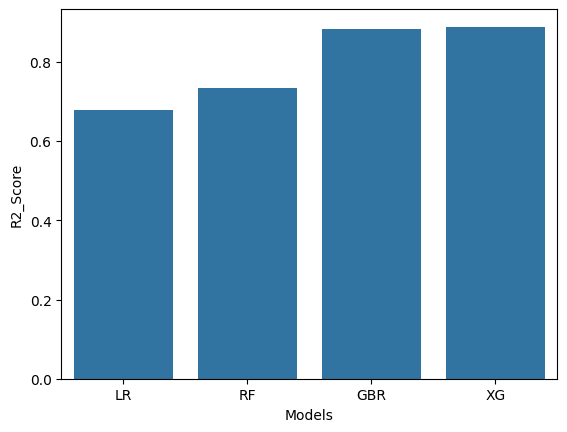

In [71]:
sns.barplot(x = score_data['Models'],y =score_data['R2_Score'])

Saving the model/best model

In [79]:
xg = XGBRegressor()
xg_final = xg.fit(X,Y)  #training it on entire dataset

In [80]:
import joblib
joblib.dump(xg_final,'Car_price_predictor')

['Car_price_predictor']

Predicting on new data

In [82]:
model = joblib.load('Car_price_predictor')
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven': 27000,
    'Fuel_Type': 0,
    'Seller_Type': 0,
    'Transmission':0,
    'Owner':0,
    'Age': 8},index=[0])

model.predict(data_new)

array([3.4819746], dtype=float32)